# Assignment12 : Polynomial fitting with regularization
# Name : Eun-Mi Joo
# Student ID : 20155714
# GitHub Link : https://github.com/joo228/assignment.git

# import package for plotting, data management and dealing image

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define data and make some noise

## x  : x-coordinate data

## y1 : (noisy) y-coordinate data

## y2 : (clean) y-coordinate data

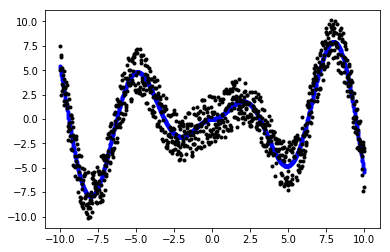

In [2]:
num     = 1001
std     = 5 

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)
y2      = y1 + nn * std

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

# define function of finding a polynomial that fits the given data and calculate error
### approximating polynomial is obtained by the least square
### $y = f(x) = \theta1 * x + \theta2$
### $\theta = (A^TA)^{-1}A^Ty2$

In [66]:
def PolyFit(p,ramda, x, y):
    A=[]
    for i in range(p+1):
        A.append(x**i)
    A = np.array(A).transpose()
    A = np.concatenate((A, np.eye(A.shape[1],dtype = float)*np.sqrt(ramda)), axis = 0)
    
    Y = np.concatenate((y.reshape(y.size,1), np.zeros((p+1, 1), dtype = float)), axis = 0)
    pinv_A=np.linalg.pinv(A)
    
    theta=np.matmul(pinv_A,Y)
    
    y_=np.matmul(A, theta)
    y_ = y_[:y.size]
    plt.plot(x, y,'y.', x, y_,'b--')
    plt.title("%ith polynomial fitting with ramda = %f" %(p ,ramda))
    plt.show()

# plot approximated polynomial from 0 to 9

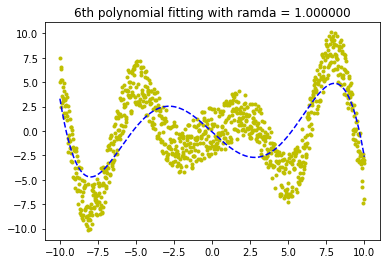

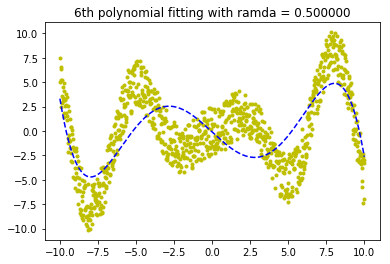

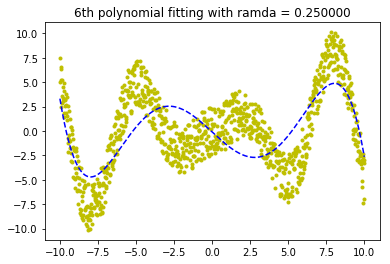

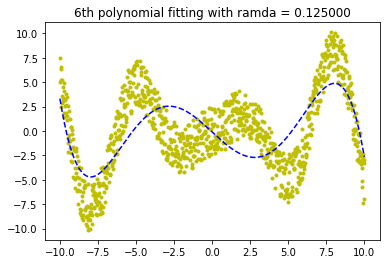

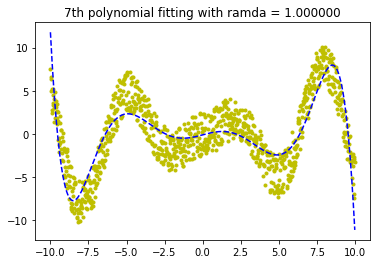

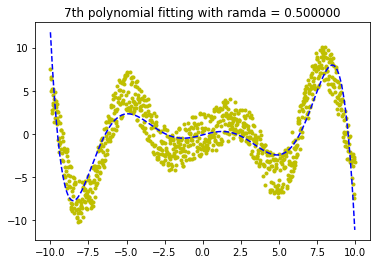

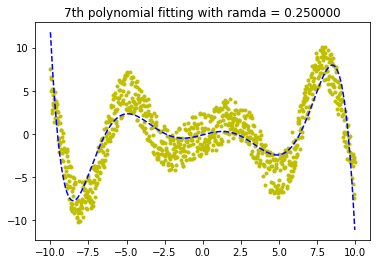

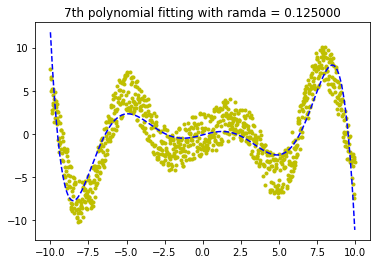

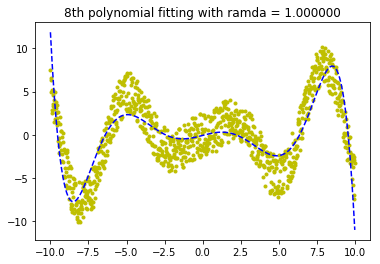

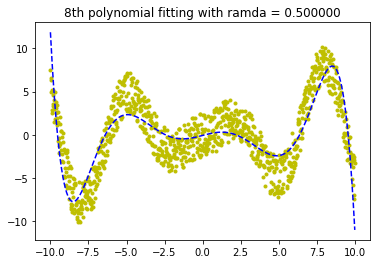

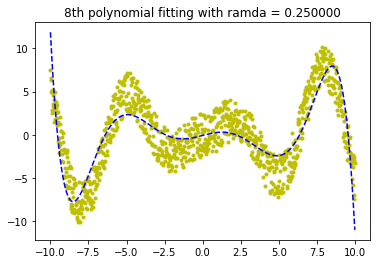

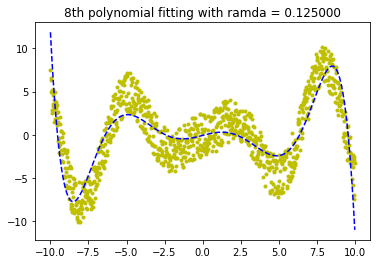

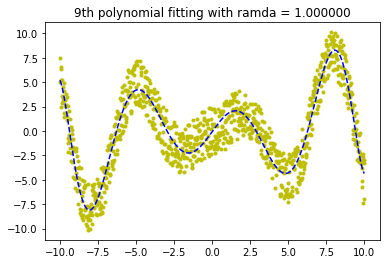

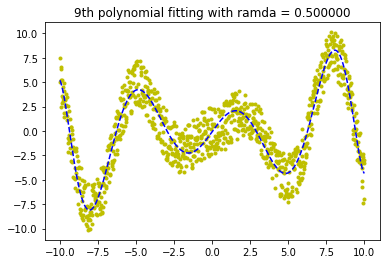

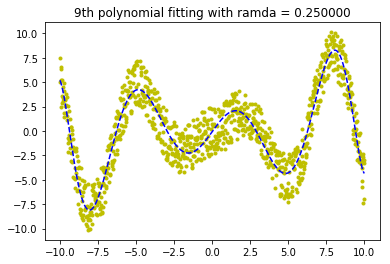

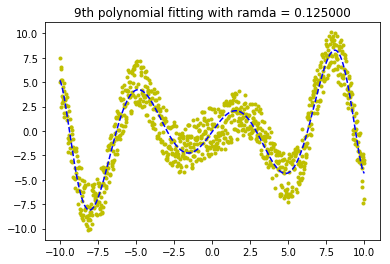

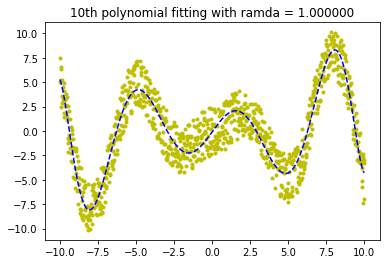

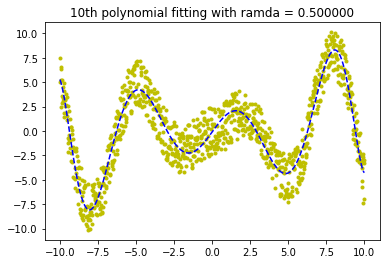

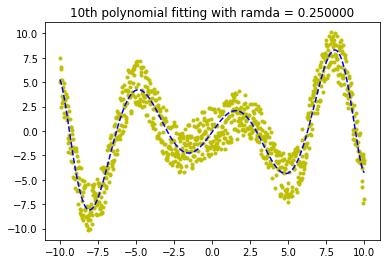

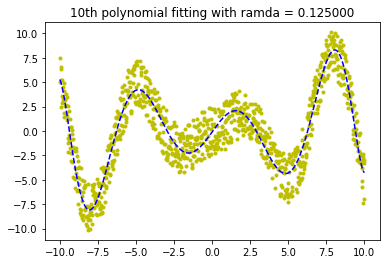

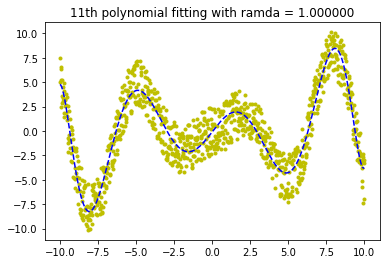

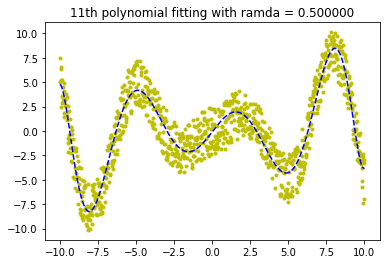

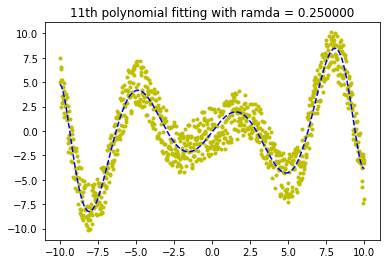

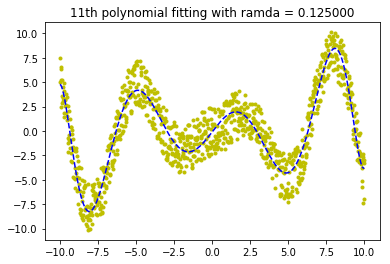

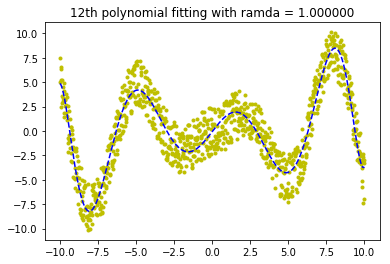

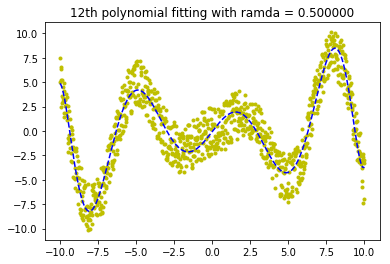

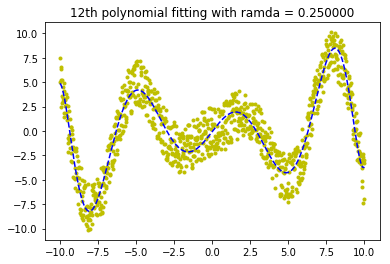

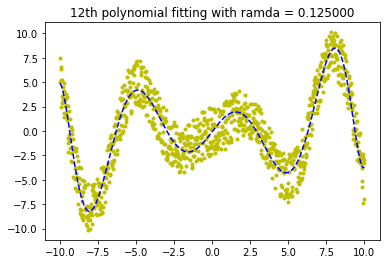

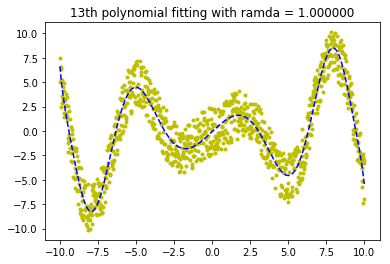

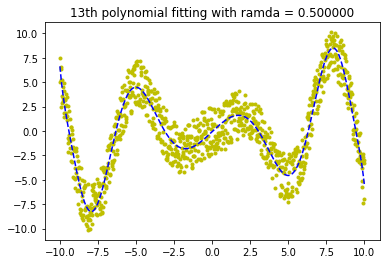

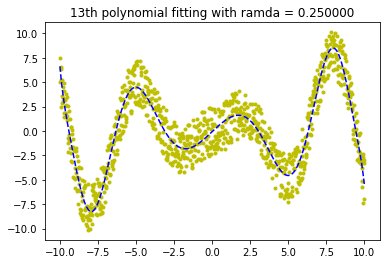

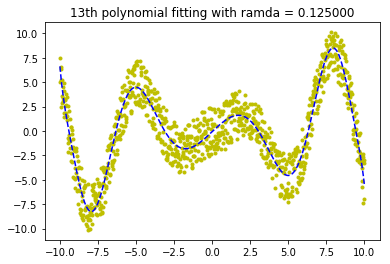

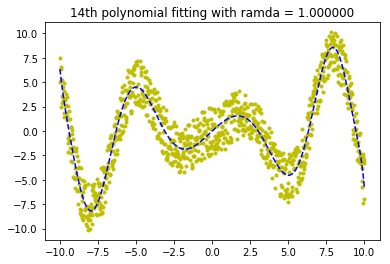

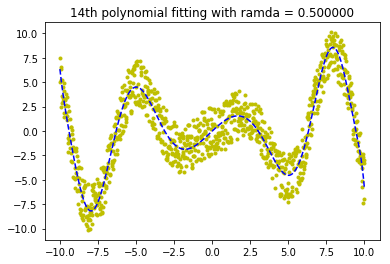

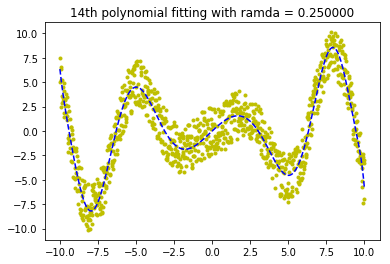

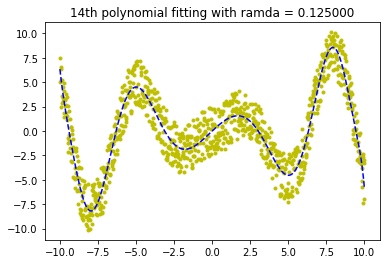

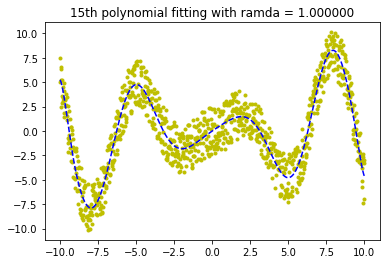

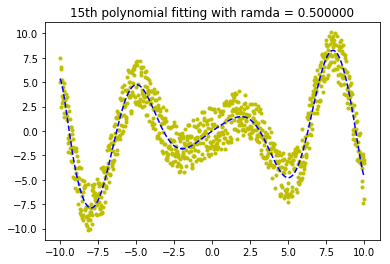

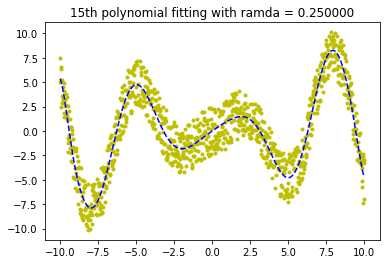

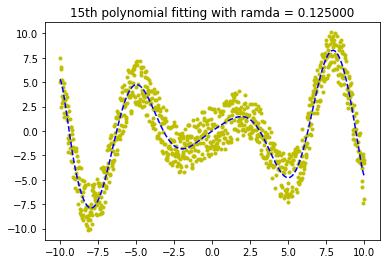

In [67]:
ramda = [1, 2**(-1), 2**(-2), 2**(-3)]
for i in range(6,16):
    for j in ramda:
        PolyFit(i, j, x, y2)